## Supply Chain Analytics : Optimizing Sales, Inventory, and Logistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Datasets

In [2]:
orders=pd.read_csv(r'C:\Users\USER\Downloads\orders_shipments.csv')
fulfillment=pd.read_csv(r'C:\Users\USER\Downloads\rinsiya_supply chain_dataset\fulfillment.csv')
inventory=pd.read_csv(r'C:\Users\USER\Downloads\rinsiya_supply chain_dataset\inventory.csv')

### Display basic info and first few rows of each dataset

In [3]:
orders_info=orders.info(),orders.head()
fulfillment_info=fulfillment.info(),fulfillment.head()
inventory_info=inventory.info(),inventory.head()
orders_info,fulfillment_info,inventory_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Order ID                     30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

((None,
     Order ID    Order Item ID    Order YearMonth    Order Year    Order Month   \
  0       3535             8793             201502          2015              2   
  1       4133            10320             201503          2015              3   
  2       7396            18517             201504          2015              4   
  3      11026            27608             201506          2015              6   
  4      11026            27609             201506          2015              6   
  
      Order Day  Order Time  Order Quantity Product Department Product Category  \
  0           21      14:07               1           Fan Shop          Fishing   
  1            2      07:37               1           Fan Shop          Fishing   
  2           18      22:47               1           Fan Shop          Fishing   
  3           10      22:32               1           Fan Shop          Fishing   
  4           10      22:32               1           Fan Shop          Fish

### Data Cleaning

#### Remove extra spaces and replace with underscores

In [6]:
orders.columns=orders.columns.str.replace(" ","_").str.strip()
fulfillment.columns=fulfillment.columns.str.replace(" ","_").str.strip()
inventory.columns=inventory.columns.str.replace(" ","_").str.strip()


#### Display updated column names


In [7]:
print("Orders Shipments Columns:",orders.columns.tolist())
print("Fulfillment Columns:",fulfillment.columns.tolist())
print("Inventory Columns:",inventory.columns.tolist())

Orders Shipments Columns: ['Order_ID_', '_Order_Item_ID_', '_Order_YearMonth_', '_Order_Year_', '_Order_Month_', '_Order_Day_', 'Order_Time', 'Order_Quantity', 'Product_Department', 'Product_Category', 'Product_Name', '_Customer_ID_', 'Customer_Market', 'Customer_Region', 'Customer_Country', 'Warehouse_Country', 'Shipment_Year', 'Shipment_Month', 'Shipment_Day', 'Shipment_Mode', '_Shipment_Days_-_Scheduled_', '_Gross_Sales_', '_Discount_%_', '_Profit_']
Fulfillment Columns: ['Product_Name', '_Warehouse_Order_Fulfillment_(days)_']
Inventory Columns: ['Product_Name', '_Year_Month_', '_Warehouse_Inventory_', 'Inventory_Cost_Per_Unit']


### Check null values

In [8]:
orders.isnull().sum()


Order_ID_                      0
_Order_Item_ID_                0
_Order_YearMonth_              0
_Order_Year_                   0
_Order_Month_                  0
_Order_Day_                    0
Order_Time                     0
Order_Quantity                 0
Product_Department             0
Product_Category               0
Product_Name                   0
_Customer_ID_                  0
Customer_Market                0
Customer_Region                0
Customer_Country               0
Warehouse_Country              0
Shipment_Year                  0
Shipment_Month                 0
Shipment_Day                   0
Shipment_Mode                  0
_Shipment_Days_-_Scheduled_    0
_Gross_Sales_                  0
_Discount_%_                   0
_Profit_                       0
dtype: int64

In [9]:
fulfillment.isnull().sum()

Product_Name                            0
_Warehouse_Order_Fulfillment_(days)_    0
dtype: int64

In [10]:
inventory.isnull().sum()

Product_Name               0
_Year_Month_               0
_Warehouse_Inventory_      0
Inventory_Cost_Per_Unit    0
dtype: int64

#### Check the Date Format

In [11]:

print(orders.info())
print(fulfillment.info())
print(inventory.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Order_ID_                    30871 non-null  int64 
 1   _Order_Item_ID_              30871 non-null  int64 
 2   _Order_YearMonth_            30871 non-null  int64 
 3   _Order_Year_                 30871 non-null  int64 
 4   _Order_Month_                30871 non-null  int64 
 5   _Order_Day_                  30871 non-null  int64 
 6   Order_Time                   30871 non-null  object
 7   Order_Quantity               30871 non-null  int64 
 8   Product_Department           30871 non-null  object
 9   Product_Category             30871 non-null  object
 10  Product_Name                 30871 non-null  object
 11  _Customer_ID_                30871 non-null  int64 
 12  Customer_Market              30871 non-null  object
 13  Customer_Region              30

### Drop duplicate rows

In [12]:
orders.drop_duplicates(inplace=True)
fulfillment.drop_duplicates(inplace=True)
inventory.drop_duplicates(inplace=True)

In [13]:
orders.duplicated().sum()

0

## Convert Date Columns to Datetime Format

In [14]:
orders['_Order_Year_']=orders['_Order_Year_'].astype(str)
orders['_Order_Month_']=orders['_Order_Month_'].astype(str)
orders['__Order_Day_']=orders['_Order_Day_'].astype(str)

### Combine columns into a single date column

In [15]:
orders['order_date']=pd.to_datetime(
    orders['_Order_Year_'] + '-' + orders['_Order_Month_'] + '-' + orders['__Order_Day_'],
    errors='coerce'
)

In [16]:
orders.isnull().sum()

Order_ID_                      0
_Order_Item_ID_                0
_Order_YearMonth_              0
_Order_Year_                   0
_Order_Month_                  0
_Order_Day_                    0
Order_Time                     0
Order_Quantity                 0
Product_Department             0
Product_Category               0
Product_Name                   0
_Customer_ID_                  0
Customer_Market                0
Customer_Region                0
Customer_Country               0
Warehouse_Country              0
Shipment_Year                  0
Shipment_Month                 0
Shipment_Day                   0
Shipment_Mode                  0
_Shipment_Days_-_Scheduled_    0
_Gross_Sales_                  0
_Discount_%_                   0
_Profit_                       0
__Order_Day_                   0
order_date                     0
dtype: int64

In [17]:
print(orders[['order_date']].head())

  order_date
0 2015-02-21
1 2015-03-02
2 2015-04-18
3 2015-06-10
4 2015-06-10


In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order_ID_                    30871 non-null  int64         
 1   _Order_Item_ID_              30871 non-null  int64         
 2   _Order_YearMonth_            30871 non-null  int64         
 3   _Order_Year_                 30871 non-null  object        
 4   _Order_Month_                30871 non-null  object        
 5   _Order_Day_                  30871 non-null  int64         
 6   Order_Time                   30871 non-null  object        
 7   Order_Quantity               30871 non-null  int64         
 8   Product_Department           30871 non-null  object        
 9   Product_Category             30871 non-null  object        
 10  Product_Name                 30871 non-null  object        
 11  _Customer_ID_                30871 non-nu

In [18]:
orders_shipment_cleaned=orders.to_excel("orders_shipment_cleand.xlsx",index=False)
import os
os.getcwd()

'C:\\Users\\USER\\Downloads'

## Exploratory Data Analysis

In [19]:
orders.describe()

,Order_ID_,_Order_Item_ID_,_Order_YearMonth_,_Order_Day_,Order_Quantity,_Customer_ID_,Shipment_Year,Shipment_Month,Shipment_Day,_Shipment_Days_-_Scheduled_,_Gross_Sales_,_Profit_,order_date
count,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871
mean,35818.833792,89380.257361,201601.137411,15.735026,2.149817,6477.672152,2015.955427,6.299569,15.978005,3.072495,200.235690,129.383305,2016-06-05 03:06:32.173884672
min,11.000000,29.000000,201501.000000,1.000000,1.000000,2.000000,2015.000000,1.000000,1.000000,1.000000,10.000000,6.000000,2015-01-01 00:00:00
25%,17905.000000,44721.500000,201509.000000,9.000000,1.000000,3177.000000,2015.000000,3.000000,9.000000,2.000000,120.000000,97.000000,2015-09-18 00:00:00
50%,35886.000000,89624.000000,201606.000000,16.000000,1.000000,6355.000000,2016.000000,6.000000,16.000000,4.000000,200.000000,125.000000,2016-06-07 00:00:00
75%,53507.000000,133710.500000,201702.000000,23.000000,3.000000,9577.000000,2017.000000,9.000000,23.000000,4.000000,300.000000,150.000000,2017-02-20 00:00:00
max,77095.000000,180410.000000,201712.000000,31.000000,5.000000,20648.000000,2017.000000,12.000000,31.000000,4.000000,533.000000,258.000000,2017-12-31 00:00:00
std,20623.809444,51279.388574,79.438616,8.484049,1.461393,3932.830830,0.798863,3.360191,8.582789,1.184417,114.251482,52.649857,NaN


In [20]:
fulfillment.describe()

,_Warehouse_Order_Fulfillment_(days)_
count,118.000000
mean,5.333898
std,2.414282
min,1.000000
25%,3.300000
50%,5.300000
75%,6.975000
max,9.900000


In [21]:
inventory.describe()

,_Year_Month_,_Warehouse_Inventory_,Inventory_Cost_Per_Unit
count,4200.000000,4200.000000,4200.000000
mean,201607.705714,16.908095,1.236450
std,81.411495,71.121721,0.652183
min,201501.000000,0.000000,0.102360
25%,201510.000000,0.000000,0.672187
50%,201607.000000,0.000000,1.262455
75%,201704.000000,4.000000,1.800760
max,201712.000000,931.000000,2.345030


### Orders Analysis

#### Total Orders Over Time

##### count orders per month

In [22]:
orders_by_month=orders.groupby(orders['order_date'].dt.to_period('M'))['Order_ID_'].count()
orders_by_month

order_date
2015-01     982
2015-02     865
2015-03     929
2015-04     942
2015-05     816
2015-06     871
2015-07     881
2015-08     878
2015-09     848
2015-10     886
2015-11     854
2015-12     869
2016-01     974
2016-02     820
2016-03     870
2016-04     901
2016-05     965
2016-06     866
2016-07     984
2016-08    1034
2016-09     894
2016-10    1027
2016-11     962
2016-12     917
2017-01     841
2017-02     910
2017-03     896
2017-04     874
2017-05     895
2017-06     873
2017-07     907
2017-08     871
2017-09     935
2017-10     363
2017-11     348
2017-12     323
Freq: M, Name: Order_ID_, dtype: int64

#### Plot Orders Over Time

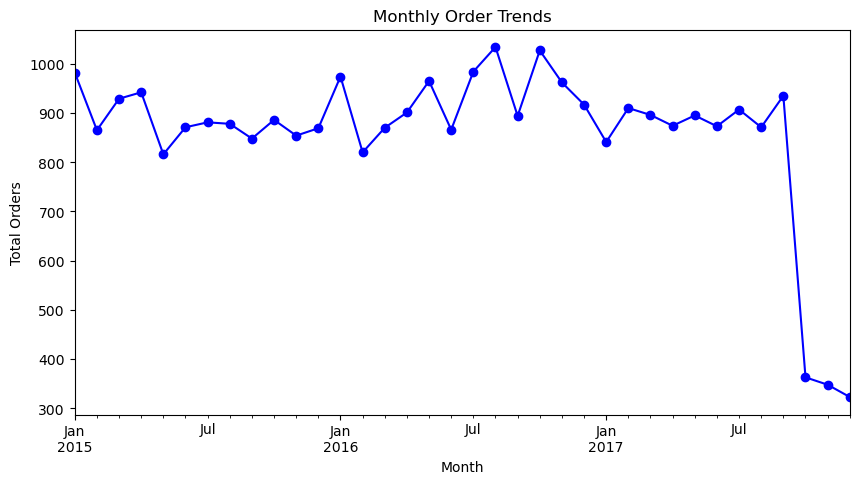

In [23]:
plt.figure(figsize=(10,5))
orders_by_month.plot(kind='line',marker='o',color='blue')
plt.title("Monthly Order Trends")
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.show()

## Best-Selling Products

In [24]:
top_products=orders.groupby('Product_Name')['Order_Quantity'].sum().sort_values(ascending=False).head(10)
top_products

Product_Name
Perfect Fitness Perfect Rip Deck                 12952
Nike Men's Dri-FIT Victory Golf Polo             10886
O'Brien Men's Neoprene Life Vest                 10164
Nike Men's Free 5.0+ Running Shoe                 6455
Under Armour Girls' Toddler Spine Surge Runni     5689
Nike Men's CJ Elite 2 TD Football Cleat           3855
Field & Stream Sportsman 16 Gun Fire Safe         2878
Pelican Sunstream 100 Kayak                       2681
Diamondback Women's Serene Classic Comfort Bi     2427
Team Golf Pittsburgh Steelers Putter Grip          194
Name: Order_Quantity, dtype: int64

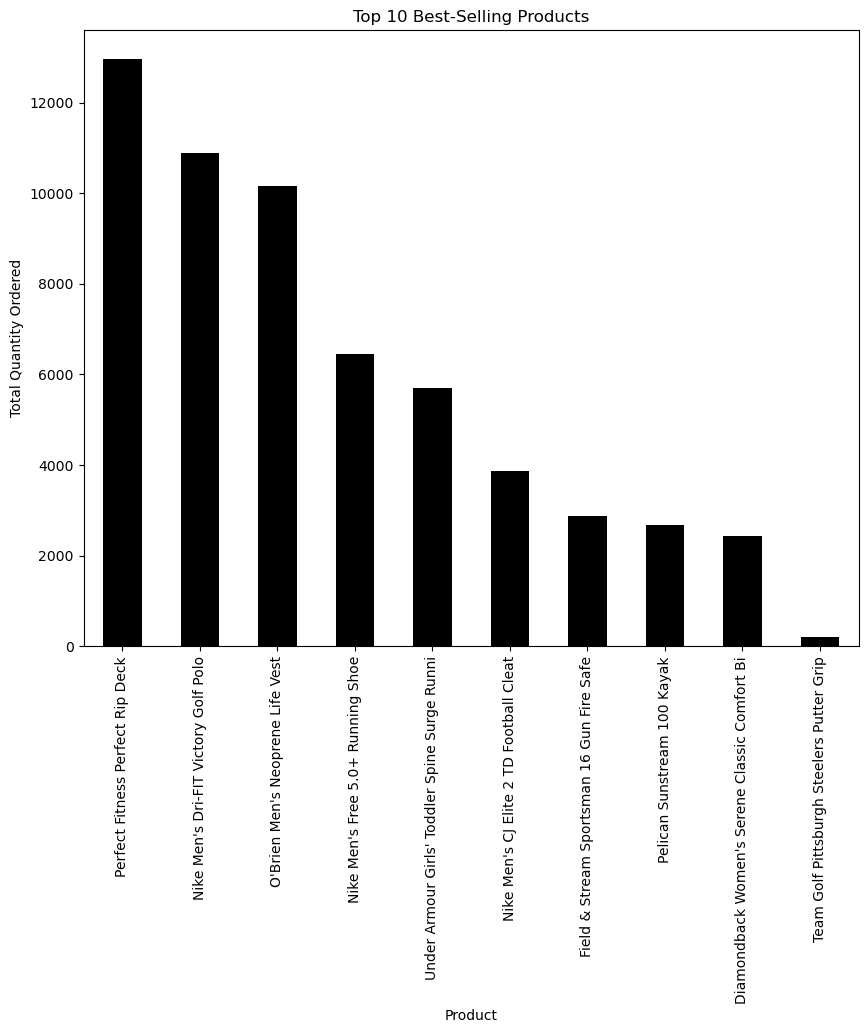

In [29]:
plt.figure(figsize=(10,8))
top_products.plot(kind='bar',color='black')
plt.title("Top 10 Best-Selling Products")
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.show()

## Inventory Analysis

### Stock Levels by Product

In [25]:
inventory.head()

,Product_Name,_Year_Month_,_Warehouse_Inventory_,Inventory_Cost_Per_Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [26]:
top_stock=inventory.groupby('Product_Name')['_Warehouse_Inventory_'].sum().sort_values(ascending=False).head(10)
top_stock

Product_Name
Perfect Fitness Perfect Rip Deck                 14481
Nike Men's Dri-FIT Victory Golf Polo             10706
O'Brien Men's Neoprene Life Vest                  9617
Nike Men's Free 5.0+ Running Shoe                 6510
Under Armour Girls' Toddler Spine Surge Runni     6177
Nike Men's CJ Elite 2 TD Football Cleat           4119
Field & Stream Sportsman 16 Gun Fire Safe         2630
Diamondback Women's Serene Classic Comfort Bi     2458
Pelican Sunstream 100 Kayak                       2352
Bowflex SelectTech 1090 Dumbbells                  811
Name: _Warehouse_Inventory_, dtype: int64

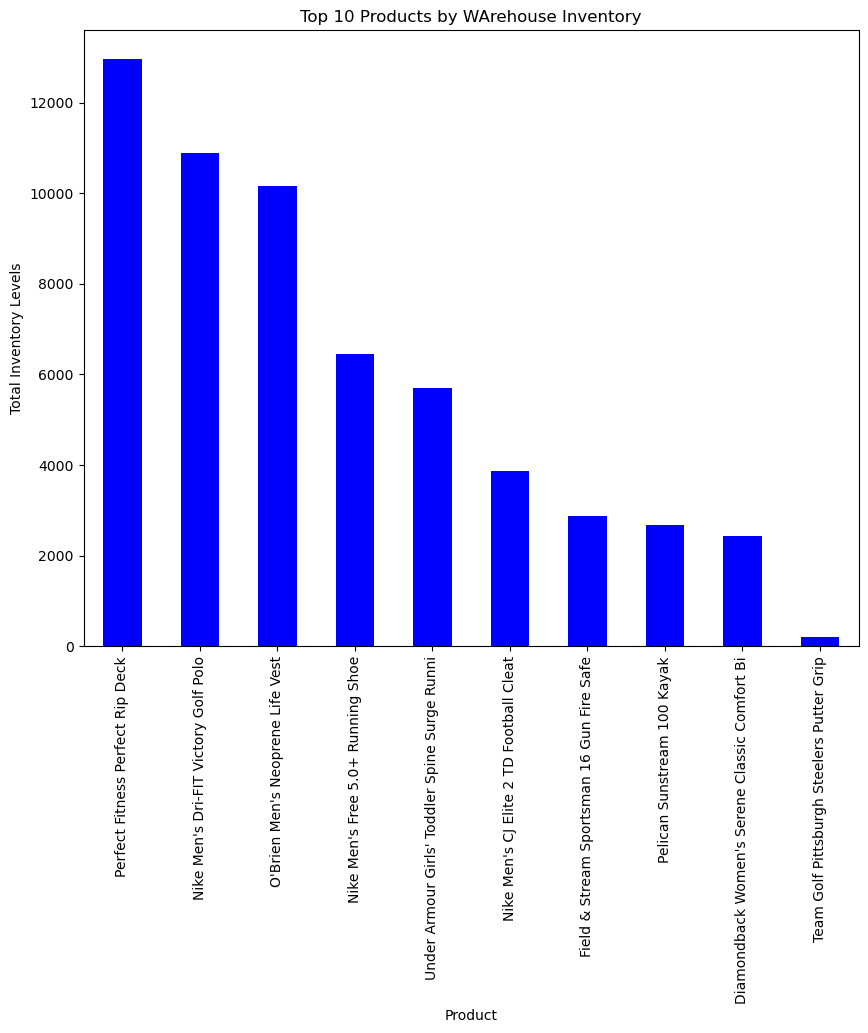

In [32]:
plt.figure(figsize=(10,8))
top_products.plot(kind='bar',color='blue')
plt.title("Top 10 Products by WArehouse Inventory")
plt.xlabel('Product')
plt.ylabel('Total Inventory Levels')
plt.show()

## Fulfillment Analysis

### Check Distribution of fulfillment Time

In [27]:
fulfillment.head()

,Product_Name,_Warehouse_Order_Fulfillment_(days)_
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


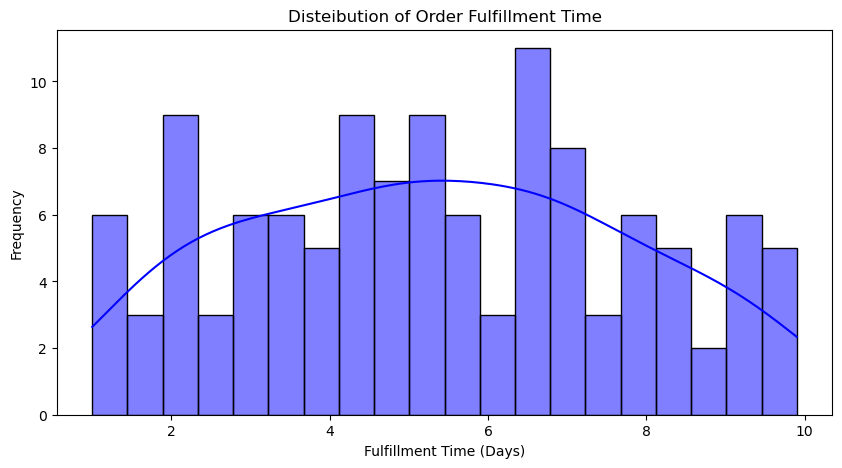

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(fulfillment['_Warehouse_Order_Fulfillment_(days)_'],bins=20,kde=True,color='blue')
plt.title("Disteibution of Order Fulfillment Time")
plt.xlabel('Fulfillment Time (Days)')
plt.ylabel('Frequency')
plt.show()

## Machine Learning

In [53]:
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
orders.columns

Index(['Order_ID_', '_Order_Item_ID_', '_Order_YearMonth_', '_Order_Year_',
       '_Order_Month_', '_Order_Day_', 'Order_Time', 'Order_Quantity',
       'Product_Department', 'Product_Category', 'Product_Name',
       '_Customer_ID_', 'Customer_Market', 'Customer_Region',
       'Customer_Country', 'Warehouse_Country', 'Shipment_Year',
       'Shipment_Month', 'Shipment_Day', 'Shipment_Mode',
       '_Shipment_Days_-_Scheduled_', '_Gross_Sales_', '_Discount_%_',
       '_Profit_', '__Order_Day_', 'order_date'],
      dtype='object')

#####  replace invalid values with nan,then drop them

In [31]:
orders['_Discount_%_']=pd.to_numeric(orders['_Discount_%_'],errors='coerce')
orders=orders.dropna(subset=['_Discount_%_'])

In [32]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29122 entries, 0 to 30869
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order_ID_                    29122 non-null  int64         
 1   _Order_Item_ID_              29122 non-null  int64         
 2   _Order_YearMonth_            29122 non-null  int64         
 3   _Order_Year_                 29122 non-null  object        
 4   _Order_Month_                29122 non-null  object        
 5   _Order_Day_                  29122 non-null  int64         
 6   Order_Time                   29122 non-null  object        
 7   Order_Quantity               29122 non-null  int64         
 8   Product_Department           29122 non-null  object        
 9   Product_Category             29122 non-null  object        
 10  Product_Name                 29122 non-null  object        
 11  _Customer_ID_                29122 non-null  i

#### Categorising col for further labeling

In [38]:
orders['_Order_Year_']=orders['_Order_Year_'].astype('category')
orders['_Order_Month_']=orders['_Order_Month_'].astype('category')
orders['_Order_Time']=orders['Order_Time'].astype('category')
orders['Product_Department']=orders['Product_Department'].astype('category')
orders['Product_Category']=orders['Product_Category'].astype('category')
orders['Product_Name']=orders['Product_Name'].astype('category')
orders['Customer_Market']=orders['Customer_Market'].astype('category')
orders['Customer_Region']=orders['Customer_Region'].astype('category')
orders['Customer_Country']=orders['Customer_Country'].astype('category')
orders['Warehouse_Country']=orders['Warehouse_Country'].astype('category')
orders['Shipment_Mode']=orders['Shipment_Mode'].astype('category')
orders['__Order_Day_']=orders['__Order_Day_'].astype('category')


In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29122 entries, 0 to 30869
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order_ID_                    29122 non-null  int64         
 1   _Order_Item_ID_              29122 non-null  int64         
 2   _Order_YearMonth_            29122 non-null  int64         
 3   _Order_Year_                 29122 non-null  category      
 4   _Order_Month_                29122 non-null  category      
 5   _Order_Day_                  29122 non-null  int64         
 6   Order_Time                   29122 non-null  object        
 7   Order_Quantity               29122 non-null  int64         
 8   Product_Department           29122 non-null  category      
 9   Product_Category             29122 non-null  category      
 10  Product_Name                 29122 non-null  category      
 11  _Customer_ID_                29122 non-null  i

#### Labelling the col

In [40]:
orders['_Order_Year_']=orders['_Order_Year_'].cat.codes
orders['_Order_Month_']=orders['_Order_Month_'].cat.codes
#orders['_Order_Time']=orders['Order_Time'].cat.codes
orders['Product_Department']=orders['Product_Department'].cat.codes
orders['Product_Category']=orders['Product_Category'].cat.codes
orders['Product_Name']=orders['Product_Name'].cat.codes
orders['Customer_Market']=orders['Customer_Market'].cat.codes
orders['Customer_Region']=orders['Customer_Region'].cat.codes
orders['Customer_Country']=orders['Customer_Country'].cat.codes
orders['Warehouse_Country']=orders['Warehouse_Country'].cat.codes
orders['Shipment_Mode']=orders['Shipment_Mode'].cat.codes
orders['__Order_Day_']=orders['__Order_Day_'].cat.codes


### Define Features and target

In [43]:
y=orders[['_Gross_Sales_']]
X=orders[['_Order_Year_','_Order_Month_','Order_Quantity','_Discount_%_','_Shipment_Days_-_Scheduled_','Product_Department','Product_Category','Product_Name','Customer_Market','Customer_Region','Customer_Country','Warehouse_Country','Shipment_Mode','__Order_Day_']]
y=orders[['_Gross_Sales_']]

**Data Split**

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [45]:
classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))


**Comparing Model Performance**

In [46]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
SVR,96.613165,0.286981,SVR()
LinearRegression,92.394304,0.347893,LinearRegression()
DecisionTreeRegressor,8.134956,0.994945,DecisionTreeRegressor()
RandomForestRegressor,5.687517,0.997529,"(DecisionTreeRegressor(max_features=1.0, rando..."


#### Prediction

In [48]:
model=RandomForestRegressor(random_state=0)
model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(random_state=0)

In [49]:
X_test.shape

(5825, 14)

In [63]:
type(y_test)

pandas.core.frame.DataFrame

In [65]:
y_testa=np.array(y_test)

In [57]:
y_pred_rfr.shape

(5825,)

In [61]:
y_pred_rfr

array([240., 200., 150., ..., 100., 130.,  11.])

In [51]:
y_pred_rfr=model.predict(X_test)
y_pred_rfr

array([240., 200., 150., ..., 100., 130.,  11.])

#### Thank you